/var/folders/fg/w2t7p9sx1_s43rj6b6h5mdqw0000gn/T/ipykernel_3194/4101406744.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpio" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Interpolate.jpeg',dpio=300,bbox_inches='tight')


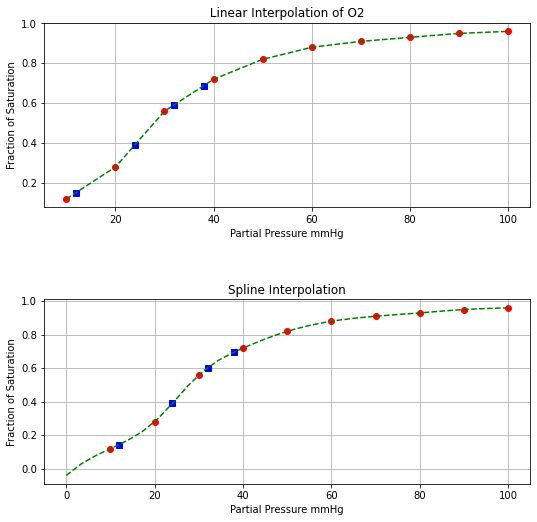

,initial pO2
0,12.0
1,24.0
2,32.0
3,38.0


,Plasma pO2,Conc - Linear (uM),Conc - Spline (uM)
0,1.200000e+01,1.337600e+03,1.270381e+03
1,2.400000e+01,3.449600e+03,3.430879e+03
2,3.200000e+01,5.209600e+03,5.314261e+03
3,3.800000e+01,6.054400e+03,6.128737e+03


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scipy as sci
import math 
from scipy.interpolate import CubicSpline

df1 = pd.read_excel('pO2_file.xlsx')#read the excel file 

p2 = df1.x.values #create a list of x values 
xsat = df1.y.values #create a list of y values 

pp=[12.0,24.0,32.0,38.0] #partial pressures

sat = 8800 #saturation concentration in uM
convhenry = .74 #mmHg/uM
sigfigs= 3 #label sigfigs


y1 = np.interp(pp,p2,xsat) #Linear Interpolation
f = CubicSpline(p2,xsat,bc_type='natural') #Spline Interpolation 
fract2 = f(pp)

x_new = np.linspace(0,100,30) 
y_new = f(x_new) 

count= 0 #create the start to the index
x_list=[] #list of x values 
y_list=[] #list of y values 
f1_list=[] #Linear Results 
f2_list=[] #Spline Results 
c1_list =[] #Linear Concentration
c2_list =[] #Spline Concentration
i_list =[]  #index list 

for x in pp: #Loading lists with desired values 
    fr1=np.interp(x,p2,xsat) #Linear Interpolation
    fr2=f(x) #Spline Interpolation
    c1=sat*fr1 #calculate concentration linear interpolation 
    c2=sat*fr2 #calculate concentration linear interpolation 
    i_list.append('%*d'%(1,count)) #add to index list 
    x_list.append('%*e'%(sigfigs-1,x))  #add to x value list
    f1_list.append('%*e'%(sigfigs-1,fr1))  #add to linear interpolation list
    f2_list.append('%*e'%(sigfigs-1,fr2))  #add to CubicSpline list
    c1_list.append('%*e'%(sigfigs-1,c1))  #add to concentration 1  list
    c2_list.append('%*e'%(sigfigs-1,c2))  #add to  concentration  2 list
    count += 1

fr_1 = np.interp(pp,p2,xsat) #set fr_1 to linear interpolation list 
fr_2 = f(pp)                 #set fr_2 to CubicSpline list 
    
fig= plt.figure(figsize=(10,8)) #create a figure size 
plt.subplot(2,1,1) #build a subplot 
plt.title (' Linear Interpolation of O2 ') #create title 
plt.plot(p2,xsat,'ro') #plot x values 
plt.plot(pp,fr_1,'bs') #plot y values 
plt.plot(p2,xsat, '--g') #plot line 
plt.xlabel('Partial Pressure mmHg') #label x axis 
plt.ylabel('Fraction of Saturation') #label y axis 
plt.grid(True) #add grid 

plt.subplot(2,1,2) #plot cubic spline 
plt.title("Spline Interpolation") #create title 
plt.plot(p2,xsat,'ro') #plot x values 
plt.plot(pp,fr_2,'bs') #plot y values 
plt.plot(x_new, y_new, '--g') #create axis
plt.xlabel('Partial Pressure mmHg') #label x axis 
plt.ylabel('Fraction of Saturation')  #label y axis
plt.grid(True) #add grid

plt.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9, hspace = 0.5) #space subplot 
fig.savefig('Interpolate.jpeg',dpio=300,bbox_inches='tight') #save figure as a *jpeg

plt.show() #show the plot 

df1 = pd.DataFrame({"initial pO2":pp}) #create first data frame 
df2 = pd.DataFrame({"Plasma pO2":x_list, "Conc - Linear (uM)": c1_list, #create second data frame 
                   "Conc - Spline (uM)": c2_list })
df1.index = i_list #index data frames 
df2.index = i_list
display(df1,df2)
list_of_dfs = [df1,df2]
with open('interpolation_dfs.csv','w',) as f: #write datarame tables to csv file
    for df in list_of_dfs:
        df.to_csv(f)
        f.write("\n")




    
